In [1]:
# Import the functions used in this project
import awesome_functions as af

# Pretty display for notebooks
%matplotlib inline

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
submission = pd.read_csv("../asset/sample_submission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("submission  data : ", submission.shape)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import pickle as pkl
slack_url = pkl.load(open("Slack_url/send_url.pickle", "rb"))

import xgboost

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_test = test.copy()
df_submission = submission.copy()

Train data :  (647054, 7)
Test  data :  (653646, 6)
submission  data :  (95674, 39)


In [2]:
train_dd_with_negative_values = af.make_df_we_wanted(df_train, df_train, df_test, is_use_positive_scancount_only=False)

##### Dummy타입으로 만든 컬럼 명 : DepartmentDescription

##### ScanCount는 음수만 사용

##### Train df 만드는 중

##### Null 컬럼 없는 모델

> 위 정보들을 Display하는 이유는 이번 FeatureMatrix를 사용한 모델에 Fit할 Test 모델 만들 때 같은 전처리를 하기 위해서다.

In [3]:
test_dd_with_negative_values = af.make_df_we_wanted(df_train, df_train, df_test, is_use_positive_scancount_only=False)

##### Dummy타입으로 만든 컬럼 명 : DepartmentDescription

##### ScanCount는 음수만 사용

##### Train df 만드는 중

##### Null 컬럼 없는 모델

> 위 정보들을 Display하는 이유는 이번 FeatureMatrix를 사용한 모델에 Fit할 Test 모델 만들 때 같은 전처리를 하기 위해서다.

In [4]:
X, y = af.get_df_to_fit(train_dd_with_negative_values)

In [5]:
X_test = af.get_df_to_fit(test_dd_with_negative_values, is_test_df=True)

In [6]:
xgb_model = xgboost.XGBClassifier(n_estimators = 250, max_depth = 2)

In [7]:
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [8]:
y_pred = xgb_model.predict(X)

In [9]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.6574

In [11]:
y_pred_proba = xgb_model.predict_proba(X_test[X.columns])

In [12]:
submit_df = af.make_submission_df(submission, y_pred_proba)

In [13]:
af.saveDataFrameToCsv(submit_df, "submit_df_includes_negative_values_dd")

In [18]:
from sklearn.externals import joblib

In [23]:
saveModelObjectAsPickle(xgb_model, "xgb_model_used_dd_includes_negative_values_.pkl")

In [2]:
df_train_dd = pd.read_csv("Feature_matrix/df_train_dd_201807291831.csv")

In [9]:
df_test_dd = pd.read_csv("Feature_matrix/df_test_dd_201807291855.csv")

In [3]:
X, y = af.get_df_to_fit(df_train_dd)

In [10]:
X_test = af.get_df_to_fit(df_test_dd, is_test_df=True)

In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression().fit(X, y)

In [6]:
y_pred = model.predict(X)

In [7]:
af.getAccuracy(y, y_pred, len(X))

##### Accuracy : 0.648

In [8]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          3       0.78      0.93      0.85      3643
          4       0.00      0.00      0.00       346
          5       0.75      0.71      0.73      4593
          6       0.68      0.49      0.57      1277
          7       0.67      0.66      0.66      5752
          8       0.63      0.88      0.74     12161
          9       0.65      0.78      0.71      9464
         12       0.29      0.02      0.04       269
         14       0.00      0.00      0.00         4
         15       0.59      0.34      0.43       978
         18       0.50      0.36      0.42       549
         19       0.46      0.17      0.24       375
         20       0.61      0.59      0.60       637
         21       0.65      0.55      0.59       641
         22       0.43      0.32      0.37       928
         23       0.22      0.05      0.08       139
         24       0.61      0.59      0.60      2609
         25       0.69      0.78      0.74   

In [11]:
y_pred_proba = model.predict_proba(X_test[X.columns])

In [12]:
submit_df = af.make_submission_df(submission, y_pred_proba)

In [13]:
af.saveDataFrameToCsv(submit_df, "submit_df_dd_logistic")

In [17]:
len(np.unique(y))

38

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [63]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
Y_train = lb.fit_transform(y_train)
Y_test = lb.fit_transform(y_test)

# y_pred = lb.inverse_transform(np.round(predictions))
# y_true = lb.inverse_transform(train_y)

In [79]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.optimizers import Adagrad
from keras.utils import np_utils

np.random.seed(0)
model0 = Sequential()
model0.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model0.add(Dense(38, activation="softmax"))
model0.compile(optimizer=Adagrad(lr=0.2), loss='categorical_crossentropy', metrics=["accuracy"])

In [80]:
%%time
hist0 = model0.fit(X_train, Y_train, epochs=500, batch_size=1000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 1.8707 - acc: 0.5143 - val_loss: 1.4429 - val_acc: 0.6097
Epoch 2/500
 - 0s - loss: 1.3471 - acc: 0.6228 - val_loss: 1.2999 - val_acc: 0.6293
Epoch 3/500
 - 0s - loss: 1.2556 - acc: 0.6359 - val_loss: 1.2500 - val_acc: 0.6293
Epoch 4/500
 - 0s - loss: 1.2135 - acc: 0.6429 - val_loss: 1.2164 - val_acc: 0.6382
Epoch 5/500
 - 0s - loss: 1.1876 - acc: 0.6467 - val_loss: 1.1993 - val_acc: 0.6387
Epoch 6/500
 - 0s - loss: 1.1699 - acc: 0.6487 - val_loss: 1.1863 - val_acc: 0.6400
Epoch 7/500
 - 0s - loss: 1.1564 - acc: 0.6512 - val_loss: 1.1763 - val_acc: 0.6423
Epoch 8/500
 - 0s - loss: 1.1463 - acc: 0.6536 - val_loss: 1.1690 - val_acc: 0.6427
Epoch 9/500
 - 0s - loss: 1.1374 - acc: 0.6549 - val_loss: 1.1621 - val_acc: 0.6446
Epoch 10/500
 - 0s - loss: 1.1303 - acc: 0.6548 - val_loss: 1.1589 - val_acc: 0.6436
Epoch 11/500
 - 0s - loss: 1.1240 - acc: 0.6567 - val_loss: 1.1514 - val_acc: 0.6481
Epoch 12/500
 - 0s - los

KeyboardInterrupt: 

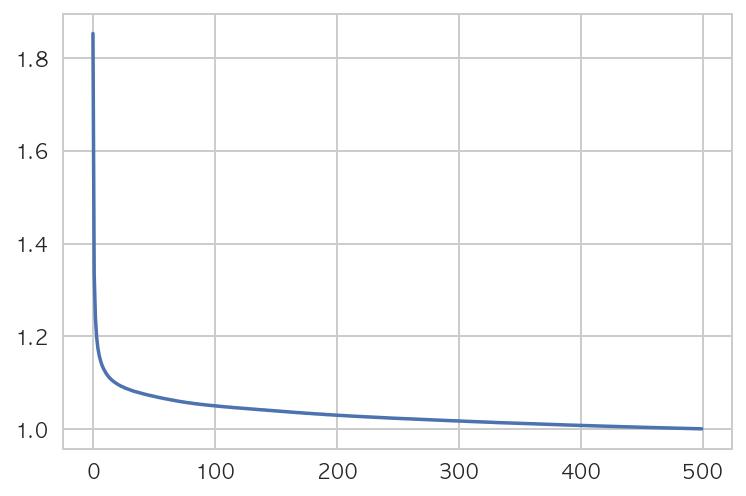

In [45]:
plt.plot(hist0.history['loss'])
plt.show()

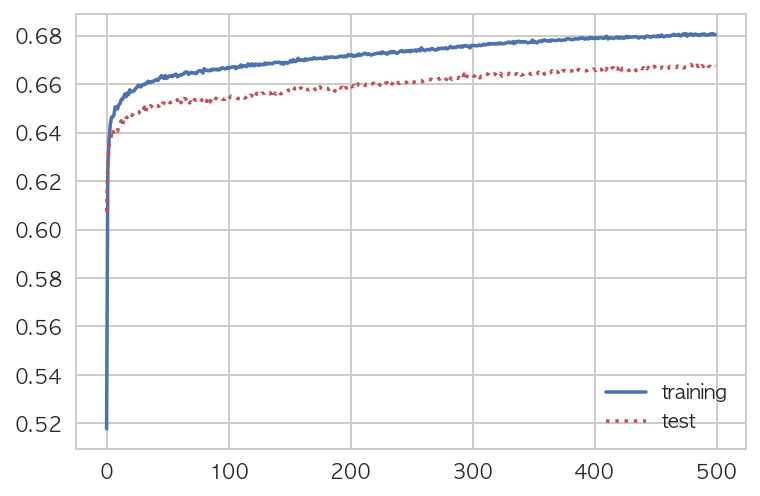

In [46]:
plt.plot(hist0.history['acc'], 'b-', label="training")
plt.plot(hist0.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [76]:
X_train.columns

Index(['Return', '1-HR PHOTO', 'ACCESSORIES', 'AUTOMOTIVE', 'BAKERY',
       'BATH AND SHOWER', 'BEAUTY', 'BEDDING', 'BOOKS AND MAGAZINES',
       'BOYS WEAR', 'BRAS & SHAPEWEAR', 'CAMERAS AND SUPPLIES',
       'CANDY, TOBACCO, COOKIES', 'CELEBRATION', 'COMM BREAD',
       'CONCEPT STORES', 'COOK AND DINE', 'DAIRY', 'DSD GROCERY',
       'ELECTRONICS', 'FABRICS AND CRAFTS', 'FINANCIAL SERVICES',
       'FROZEN FOODS', 'FURNITURE', 'GIRLS WEAR, 4-6X  AND 7-14',
       'GROCERY DRY GOODS', 'HARDWARE', 'HEALTH AND BEAUTY AIDS', 'HOME DECOR',
       'HOME MANAGEMENT', 'HORTICULTURE AND ACCESS',
       'HOUSEHOLD CHEMICALS/SUPP', 'HOUSEHOLD PAPER GOODS',
       'IMPULSE MERCHANDISE', 'INFANT APPAREL', 'INFANT CONSUMABLE HARDLINES',
       'JEWELRY AND SUNGLASSES', 'LADIES SOCKS', 'LADIESWEAR',
       'LARGE HOUSEHOLD GOODS', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEAT - FRESH & FROZEN', 'MEDIA AND GAMING', 'MENS WEAR', 'MENSWEAR',
       'Null', 'OFFICE SUPPLIES', 'OPTICAL - FRAMES'

In [81]:
model1 = Sequential()
model1.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model1.add(Dense(20, activation="sigmoid"))
model1.add(Dense(38, activation="softmax"))
model1.compile(optimizer=Adagrad(lr=0.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [114]:
%%time
hist1 = model1.fit(X_train, Y_train, epochs=100, batch_size=1000, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/100
 - 0s - loss: 0.9111 - acc: 0.7001 - val_loss: 0.9635 - val_acc: 0.6903
Epoch 2/100
 - 0s - loss: 0.9113 - acc: 0.7006 - val_loss: 0.9640 - val_acc: 0.6893
Epoch 3/100
 - 0s - loss: 0.9111 - acc: 0.7011 - val_loss: 0.9635 - val_acc: 0.6902
Epoch 4/100
 - 0s - loss: 0.9112 - acc: 0.7002 - val_loss: 0.9635 - val_acc: 0.6904
Epoch 5/100
 - 0s - loss: 0.9112 - acc: 0.7006 - val_loss: 0.9634 - val_acc: 0.6903
Epoch 6/100
 - 0s - loss: 0.9111 - acc: 0.6996 - val_loss: 0.9629 - val_acc: 0.6904
Epoch 7/100
 - 0s - loss: 0.9111 - acc: 0.7003 - val_loss: 0.9635 - val_acc: 0.6910
Epoch 8/100
 - 0s - loss: 0.9112 - acc: 0.7006 - val_loss: 0.9633 - val_acc: 0.6902
Epoch 9/100
 - 0s - loss: 0.9112 - acc: 0.6998 - val_loss: 0.9637 - val_acc: 0.6894
Epoch 10/100
 - 0s - loss: 0.9113 - acc: 0.7003 - val_loss: 0.9633 - val_acc: 0.6898
Epoch 11/100
 - 0s - loss: 0.9112 - acc: 0.7008 - val_loss: 0.9628 - val_acc: 0.6903
Epoch 12/100
 - 0s - los

Epoch 97/100
 - 0s - loss: 0.9102 - acc: 0.7003 - val_loss: 0.9621 - val_acc: 0.6906
Epoch 98/100
 - 0s - loss: 0.9104 - acc: 0.7004 - val_loss: 0.9624 - val_acc: 0.6903
Epoch 99/100
 - 0s - loss: 0.9103 - acc: 0.7007 - val_loss: 0.9635 - val_acc: 0.6901
Epoch 100/100
 - 0s - loss: 0.9104 - acc: 0.7007 - val_loss: 0.9626 - val_acc: 0.6900
CPU times: user 1min 7s, sys: 10.1 s, total: 1min 17s
Wall time: 34.9 s


In [115]:
np.max(hist1.history["val_acc"])

0.6912986643326199

In [125]:
np.min(hist1.history["val_loss"])

0.9620314543696399

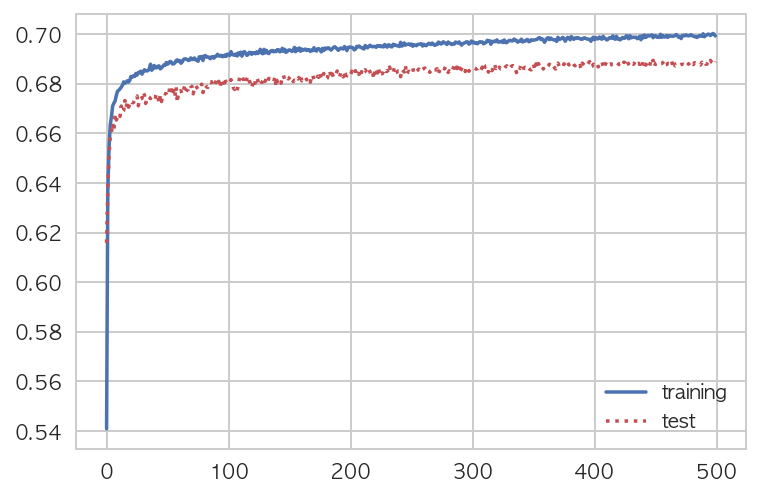

In [83]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [93]:
len(X_test)

38270

In [94]:
X_test_keras = af.get_df_to_fit(df_test_dd, is_test_df=True)

In [95]:
y_pred_proba = model1.predict_proba(X_test_keras[X.columns])

In [96]:
len(y_pred_proba)

95674

In [97]:
submit_df = af.make_submission_df(submission, y_pred_proba)
af.saveDataFrameToCsv(submit_df, "submit_df_dd_keras")

In [120]:
model2 = Sequential()
model2.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model2.add(Dense(20, activation="sigmoid", kernel_initializer="glorot_uniform"))
model2.add(Dense(38, activation="softmax"))
model2.compile(optimizer=Adagrad(lr=1.0), loss='categorical_crossentropy', metrics=["accuracy"])

In [121]:
%%time
hist2 = model2.fit(X_train, Y_train, epochs=500, batch_size=250, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 1.9738 - acc: 0.4617 - val_loss: 1.4826 - val_acc: 0.5694
Epoch 2/500
 - 1s - loss: 1.3430 - acc: 0.6132 - val_loss: 1.3057 - val_acc: 0.6186
Epoch 3/500
 - 1s - loss: 1.2383 - acc: 0.6352 - val_loss: 1.2385 - val_acc: 0.6418
Epoch 4/500
 - 1s - loss: 1.1889 - acc: 0.6462 - val_loss: 1.2219 - val_acc: 0.6378
Epoch 5/500
 - 1s - loss: 1.1595 - acc: 0.6516 - val_loss: 1.1862 - val_acc: 0.6451
Epoch 6/500
 - 1s - loss: 1.1372 - acc: 0.6555 - val_loss: 1.1982 - val_acc: 0.6353
Epoch 7/500
 - 1s - loss: 1.1221 - acc: 0.6599 - val_loss: 1.1541 - val_acc: 0.6546
Epoch 8/500
 - 1s - loss: 1.1078 - acc: 0.6639 - val_loss: 1.1376 - val_acc: 0.6587
Epoch 9/500
 - 1s - loss: 1.0957 - acc: 0.6659 - val_loss: 1.1363 - val_acc: 0.6583
Epoch 10/500
 - 1s - loss: 1.0895 - acc: 0.6690 - val_loss: 1.1280 - val_acc: 0.6609
Epoch 11/500
 - 1s - loss: 1.0820 - acc: 0.6699 - val_loss: 1.1251 - val_acc: 0.6547
Epoch 12/500
 - 1s - los

Epoch 97/500
 - 1s - loss: 0.9460 - acc: 0.6947 - val_loss: 0.9988 - val_acc: 0.6820
Epoch 98/500
 - 1s - loss: 0.9458 - acc: 0.6958 - val_loss: 0.9964 - val_acc: 0.6856
Epoch 99/500
 - 1s - loss: 0.9452 - acc: 0.6945 - val_loss: 0.9966 - val_acc: 0.6848
Epoch 100/500
 - 1s - loss: 0.9457 - acc: 0.6943 - val_loss: 0.9954 - val_acc: 0.6868
Epoch 101/500
 - 1s - loss: 0.9438 - acc: 0.6955 - val_loss: 1.0002 - val_acc: 0.6814
Epoch 102/500
 - 1s - loss: 0.9448 - acc: 0.6945 - val_loss: 0.9927 - val_acc: 0.6874
Epoch 103/500
 - 1s - loss: 0.9438 - acc: 0.6957 - val_loss: 0.9963 - val_acc: 0.6856
Epoch 104/500
 - 1s - loss: 0.9430 - acc: 0.6961 - val_loss: 0.9946 - val_acc: 0.6860
Epoch 105/500
 - 1s - loss: 0.9422 - acc: 0.6956 - val_loss: 0.9957 - val_acc: 0.6842
Epoch 106/500
 - 1s - loss: 0.9419 - acc: 0.6960 - val_loss: 0.9950 - val_acc: 0.6841
Epoch 107/500
 - 1s - loss: 0.9422 - acc: 0.6943 - val_loss: 1.0004 - val_acc: 0.6835
Epoch 108/500
 - 1s - loss: 0.9421 - acc: 0.6957 - val_lo

Epoch 193/500
 - 1s - loss: 0.9247 - acc: 0.6984 - val_loss: 0.9844 - val_acc: 0.6855
Epoch 194/500
 - 1s - loss: 0.9243 - acc: 0.6981 - val_loss: 0.9801 - val_acc: 0.6869
Epoch 195/500
 - 1s - loss: 0.9242 - acc: 0.6985 - val_loss: 0.9794 - val_acc: 0.6886
Epoch 196/500
 - 1s - loss: 0.9238 - acc: 0.6986 - val_loss: 0.9826 - val_acc: 0.6861
Epoch 197/500
 - 1s - loss: 0.9241 - acc: 0.6987 - val_loss: 0.9798 - val_acc: 0.6877
Epoch 198/500
 - 1s - loss: 0.9241 - acc: 0.6995 - val_loss: 0.9795 - val_acc: 0.6886
Epoch 199/500
 - 1s - loss: 0.9240 - acc: 0.6981 - val_loss: 0.9781 - val_acc: 0.6884
Epoch 200/500
 - 1s - loss: 0.9232 - acc: 0.6989 - val_loss: 0.9816 - val_acc: 0.6872
Epoch 201/500
 - 1s - loss: 0.9235 - acc: 0.6981 - val_loss: 0.9817 - val_acc: 0.6885
Epoch 202/500
 - 1s - loss: 0.9237 - acc: 0.6981 - val_loss: 0.9837 - val_acc: 0.6874
Epoch 203/500
 - 1s - loss: 0.9236 - acc: 0.6987 - val_loss: 0.9855 - val_acc: 0.6871
Epoch 204/500
 - 1s - loss: 0.9232 - acc: 0.6984 - val

Epoch 289/500
 - 1s - loss: 0.9158 - acc: 0.7006 - val_loss: 0.9751 - val_acc: 0.6882
Epoch 290/500
 - 1s - loss: 0.9159 - acc: 0.7005 - val_loss: 0.9717 - val_acc: 0.6898
Epoch 291/500
 - 1s - loss: 0.9154 - acc: 0.7003 - val_loss: 0.9724 - val_acc: 0.6881
Epoch 292/500
 - 1s - loss: 0.9153 - acc: 0.7003 - val_loss: 0.9719 - val_acc: 0.6888
Epoch 293/500
 - 1s - loss: 0.9150 - acc: 0.7005 - val_loss: 0.9740 - val_acc: 0.6891
Epoch 294/500
 - 1s - loss: 0.9151 - acc: 0.7005 - val_loss: 0.9729 - val_acc: 0.6889
Epoch 295/500
 - 1s - loss: 0.9151 - acc: 0.7005 - val_loss: 0.9751 - val_acc: 0.6894
Epoch 296/500
 - 1s - loss: 0.9155 - acc: 0.7010 - val_loss: 0.9717 - val_acc: 0.6888
Epoch 297/500
 - 1s - loss: 0.9143 - acc: 0.7002 - val_loss: 0.9722 - val_acc: 0.6891
Epoch 298/500
 - 1s - loss: 0.9151 - acc: 0.6999 - val_loss: 0.9725 - val_acc: 0.6896
Epoch 299/500
 - 1s - loss: 0.9149 - acc: 0.6992 - val_loss: 0.9732 - val_acc: 0.6884
Epoch 300/500
 - 1s - loss: 0.9151 - acc: 0.7013 - val

Epoch 385/500
 - 1s - loss: 0.9103 - acc: 0.7014 - val_loss: 0.9705 - val_acc: 0.6902
Epoch 386/500
 - 1s - loss: 0.9101 - acc: 0.7010 - val_loss: 0.9704 - val_acc: 0.6893
Epoch 387/500
 - 1s - loss: 0.9106 - acc: 0.7009 - val_loss: 0.9695 - val_acc: 0.6900
Epoch 388/500
 - 1s - loss: 0.9102 - acc: 0.7021 - val_loss: 0.9710 - val_acc: 0.6903
Epoch 389/500
 - 1s - loss: 0.9101 - acc: 0.7011 - val_loss: 0.9719 - val_acc: 0.6900
Epoch 390/500
 - 1s - loss: 0.9103 - acc: 0.7013 - val_loss: 0.9741 - val_acc: 0.6889
Epoch 391/500
 - 1s - loss: 0.9107 - acc: 0.7017 - val_loss: 0.9711 - val_acc: 0.6911
Epoch 392/500
 - 1s - loss: 0.9103 - acc: 0.7009 - val_loss: 0.9699 - val_acc: 0.6897
Epoch 393/500
 - 1s - loss: 0.9096 - acc: 0.7015 - val_loss: 0.9699 - val_acc: 0.6886
Epoch 394/500
 - 1s - loss: 0.9097 - acc: 0.7008 - val_loss: 0.9701 - val_acc: 0.6907
Epoch 395/500
 - 1s - loss: 0.9097 - acc: 0.7012 - val_loss: 0.9694 - val_acc: 0.6903
Epoch 396/500
 - 1s - loss: 0.9103 - acc: 0.7015 - val

Epoch 481/500
 - 1s - loss: 0.9063 - acc: 0.7012 - val_loss: 0.9692 - val_acc: 0.6910
Epoch 482/500
 - 1s - loss: 0.9064 - acc: 0.7010 - val_loss: 0.9664 - val_acc: 0.6902
Epoch 483/500
 - 1s - loss: 0.9061 - acc: 0.7011 - val_loss: 0.9674 - val_acc: 0.6920
Epoch 484/500
 - 1s - loss: 0.9066 - acc: 0.7016 - val_loss: 0.9658 - val_acc: 0.6900
Epoch 485/500
 - 1s - loss: 0.9061 - acc: 0.7019 - val_loss: 0.9647 - val_acc: 0.6911
Epoch 486/500
 - 1s - loss: 0.9061 - acc: 0.7017 - val_loss: 0.9657 - val_acc: 0.6927
Epoch 487/500
 - 1s - loss: 0.9064 - acc: 0.7020 - val_loss: 0.9669 - val_acc: 0.6912
Epoch 488/500
 - 1s - loss: 0.9064 - acc: 0.7025 - val_loss: 0.9699 - val_acc: 0.6909
Epoch 489/500
 - 1s - loss: 0.9060 - acc: 0.7028 - val_loss: 0.9674 - val_acc: 0.6904
Epoch 490/500
 - 1s - loss: 0.9057 - acc: 0.7014 - val_loss: 0.9678 - val_acc: 0.6912
Epoch 491/500
 - 1s - loss: 0.9059 - acc: 0.7026 - val_loss: 0.9665 - val_acc: 0.6909
Epoch 492/500
 - 1s - loss: 0.9057 - acc: 0.7022 - val

In [122]:
%%time
hist2_1 = model2.fit(X_train, Y_train, epochs=500, batch_size=250, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 0.9054 - acc: 0.7022 - val_loss: 0.9650 - val_acc: 0.6904
Epoch 2/500
 - 1s - loss: 0.9053 - acc: 0.7023 - val_loss: 0.9666 - val_acc: 0.6907
Epoch 3/500
 - 1s - loss: 0.9052 - acc: 0.7019 - val_loss: 0.9647 - val_acc: 0.6907
Epoch 4/500
 - 1s - loss: 0.9050 - acc: 0.7026 - val_loss: 0.9651 - val_acc: 0.6915
Epoch 5/500
 - 1s - loss: 0.9053 - acc: 0.7022 - val_loss: 0.9634 - val_acc: 0.6922
Epoch 6/500
 - 1s - loss: 0.9053 - acc: 0.7007 - val_loss: 0.9668 - val_acc: 0.6916
Epoch 7/500
 - 1s - loss: 0.9051 - acc: 0.7027 - val_loss: 0.9670 - val_acc: 0.6900
Epoch 8/500
 - 1s - loss: 0.9045 - acc: 0.7016 - val_loss: 0.9686 - val_acc: 0.6908
Epoch 9/500
 - 1s - loss: 0.9053 - acc: 0.7019 - val_loss: 0.9660 - val_acc: 0.6918
Epoch 10/500
 - 1s - loss: 0.9049 - acc: 0.7022 - val_loss: 0.9663 - val_acc: 0.6912
Epoch 11/500
 - 1s - loss: 0.9047 - acc: 0.7022 - val_loss: 0.9669 - val_acc: 0.6912
Epoch 12/500
 - 1s - los

Epoch 97/500
 - 1s - loss: 0.9020 - acc: 0.7024 - val_loss: 0.9625 - val_acc: 0.6930
Epoch 98/500
 - 1s - loss: 0.9022 - acc: 0.7033 - val_loss: 0.9646 - val_acc: 0.6912
Epoch 99/500
 - 1s - loss: 0.9023 - acc: 0.7034 - val_loss: 0.9632 - val_acc: 0.6916
Epoch 100/500
 - 1s - loss: 0.9019 - acc: 0.7029 - val_loss: 0.9630 - val_acc: 0.6926
Epoch 101/500
 - 1s - loss: 0.9023 - acc: 0.7032 - val_loss: 0.9634 - val_acc: 0.6902
Epoch 102/500
 - 1s - loss: 0.9022 - acc: 0.7025 - val_loss: 0.9641 - val_acc: 0.6914
Epoch 103/500
 - 1s - loss: 0.9021 - acc: 0.7026 - val_loss: 0.9650 - val_acc: 0.6906
Epoch 104/500
 - 1s - loss: 0.9021 - acc: 0.7030 - val_loss: 0.9645 - val_acc: 0.6935
Epoch 105/500
 - 1s - loss: 0.9021 - acc: 0.7034 - val_loss: 0.9658 - val_acc: 0.6927
Epoch 106/500
 - 1s - loss: 0.9019 - acc: 0.7028 - val_loss: 0.9632 - val_acc: 0.6918
Epoch 107/500
 - 1s - loss: 0.9020 - acc: 0.7032 - val_loss: 0.9626 - val_acc: 0.6915
Epoch 108/500
 - 1s - loss: 0.9020 - acc: 0.7039 - val_lo

Epoch 193/500
 - 1s - loss: 0.8995 - acc: 0.7036 - val_loss: 0.9600 - val_acc: 0.6912
Epoch 194/500
 - 1s - loss: 0.8996 - acc: 0.7037 - val_loss: 0.9595 - val_acc: 0.6913
Epoch 195/500
 - 1s - loss: 0.8997 - acc: 0.7028 - val_loss: 0.9596 - val_acc: 0.6926
Epoch 196/500
 - 1s - loss: 0.8995 - acc: 0.7040 - val_loss: 0.9600 - val_acc: 0.6921
Epoch 197/500
 - 1s - loss: 0.9000 - acc: 0.7033 - val_loss: 0.9590 - val_acc: 0.6917
Epoch 198/500
 - 1s - loss: 0.8998 - acc: 0.7031 - val_loss: 0.9592 - val_acc: 0.6912
Epoch 199/500
 - 1s - loss: 0.8992 - acc: 0.7033 - val_loss: 0.9614 - val_acc: 0.6925
Epoch 200/500
 - 1s - loss: 0.8996 - acc: 0.7036 - val_loss: 0.9599 - val_acc: 0.6937
Epoch 201/500
 - 1s - loss: 0.8992 - acc: 0.7042 - val_loss: 0.9618 - val_acc: 0.6910
Epoch 202/500
 - 1s - loss: 0.8994 - acc: 0.7029 - val_loss: 0.9601 - val_acc: 0.6929
Epoch 203/500
 - 1s - loss: 0.8993 - acc: 0.7035 - val_loss: 0.9599 - val_acc: 0.6915
Epoch 204/500
 - 1s - loss: 0.8991 - acc: 0.7029 - val

Epoch 289/500
 - 1s - loss: 0.8977 - acc: 0.7029 - val_loss: 0.9580 - val_acc: 0.6919
Epoch 290/500
 - 1s - loss: 0.8973 - acc: 0.7043 - val_loss: 0.9563 - val_acc: 0.6927
Epoch 291/500
 - 1s - loss: 0.8978 - acc: 0.7040 - val_loss: 0.9586 - val_acc: 0.6907
Epoch 292/500
 - 1s - loss: 0.8976 - acc: 0.7041 - val_loss: 0.9616 - val_acc: 0.6911
Epoch 293/500
 - 1s - loss: 0.8976 - acc: 0.7035 - val_loss: 0.9638 - val_acc: 0.6915
Epoch 294/500
 - 1s - loss: 0.8974 - acc: 0.7042 - val_loss: 0.9576 - val_acc: 0.6924
Epoch 295/500
 - 1s - loss: 0.8973 - acc: 0.7035 - val_loss: 0.9596 - val_acc: 0.6910
Epoch 296/500
 - 1s - loss: 0.8975 - acc: 0.7037 - val_loss: 0.9576 - val_acc: 0.6923
Epoch 297/500
 - 1s - loss: 0.8973 - acc: 0.7040 - val_loss: 0.9585 - val_acc: 0.6920
Epoch 298/500
 - 1s - loss: 0.8976 - acc: 0.7038 - val_loss: 0.9578 - val_acc: 0.6920
Epoch 299/500
 - 1s - loss: 0.8973 - acc: 0.7035 - val_loss: 0.9575 - val_acc: 0.6930
Epoch 300/500
 - 1s - loss: 0.8973 - acc: 0.7026 - val

Epoch 385/500
 - 1s - loss: 0.8957 - acc: 0.7037 - val_loss: 0.9576 - val_acc: 0.6919
Epoch 386/500
 - 1s - loss: 0.8956 - acc: 0.7032 - val_loss: 0.9582 - val_acc: 0.6935
Epoch 387/500
 - 1s - loss: 0.8957 - acc: 0.7043 - val_loss: 0.9555 - val_acc: 0.6918
Epoch 388/500
 - 1s - loss: 0.8957 - acc: 0.7052 - val_loss: 0.9593 - val_acc: 0.6938
Epoch 389/500
 - 1s - loss: 0.8957 - acc: 0.7037 - val_loss: 0.9555 - val_acc: 0.6926
Epoch 390/500
 - 1s - loss: 0.8960 - acc: 0.7048 - val_loss: 0.9590 - val_acc: 0.6924
Epoch 391/500
 - 1s - loss: 0.8957 - acc: 0.7040 - val_loss: 0.9589 - val_acc: 0.6936
Epoch 392/500
 - 1s - loss: 0.8957 - acc: 0.7044 - val_loss: 0.9555 - val_acc: 0.6915
Epoch 393/500
 - 1s - loss: 0.8957 - acc: 0.7040 - val_loss: 0.9572 - val_acc: 0.6927
Epoch 394/500
 - 1s - loss: 0.8957 - acc: 0.7038 - val_loss: 0.9556 - val_acc: 0.6913
Epoch 395/500
 - 1s - loss: 0.8956 - acc: 0.7040 - val_loss: 0.9548 - val_acc: 0.6924
Epoch 396/500
 - 1s - loss: 0.8957 - acc: 0.7046 - val

Epoch 481/500
 - 1s - loss: 0.8942 - acc: 0.7043 - val_loss: 0.9571 - val_acc: 0.6933
Epoch 482/500
 - 1s - loss: 0.8948 - acc: 0.7040 - val_loss: 0.9537 - val_acc: 0.6931
Epoch 483/500
 - 1s - loss: 0.8939 - acc: 0.7047 - val_loss: 0.9554 - val_acc: 0.6941
Epoch 484/500
 - 1s - loss: 0.8948 - acc: 0.7048 - val_loss: 0.9558 - val_acc: 0.6915
Epoch 485/500
 - 1s - loss: 0.8943 - acc: 0.7047 - val_loss: 0.9540 - val_acc: 0.6940
Epoch 486/500
 - 1s - loss: 0.8945 - acc: 0.7041 - val_loss: 0.9532 - val_acc: 0.6937
Epoch 487/500
 - 1s - loss: 0.8944 - acc: 0.7047 - val_loss: 0.9540 - val_acc: 0.6929
Epoch 488/500
 - 1s - loss: 0.8943 - acc: 0.7048 - val_loss: 0.9532 - val_acc: 0.6932
Epoch 489/500
 - 1s - loss: 0.8944 - acc: 0.7039 - val_loss: 0.9554 - val_acc: 0.6944
Epoch 490/500
 - 1s - loss: 0.8943 - acc: 0.7045 - val_loss: 0.9551 - val_acc: 0.6927
Epoch 491/500
 - 1s - loss: 0.8944 - acc: 0.7044 - val_loss: 0.9563 - val_acc: 0.6928
Epoch 492/500
 - 1s - loss: 0.8943 - acc: 0.7047 - val

In [123]:
np.max(hist2_1.history["val_acc"])

0.694904625275629

In [124]:
np.min(hist2_1.history["val_loss"])

0.9531713836430444

In [98]:
df_train_fl = pd.read_csv("Feature_matrix/df_train_fl_201807291845.csv")

In [104]:
X, y = af.get_df_to_fit(df_train_fl)

In [105]:
from sklearn.model_selection import train_test_split
X_train_fl, X_test_fl, y_train_fl, y_test_fl = train_test_split(X, y, test_size=0.4, random_state=0)

In [106]:
Y_train_fl = lb.fit_transform(y_train_fl)
Y_test_fl = lb.fit_transform(y_test_fl)

In [107]:
X_train_fl.shape

(57404, 5362)

In [126]:
model4 = Sequential()
model4.add(Dense(10, input_dim=77, activation="sigmoid", kernel_initializer="glorot_uniform"))
model4.add(Dense(10, activation="sigmoid", kernel_initializer="glorot_uniform"))
model4.add(Dense(38, activation="softmax"))
model4.compile(optimizer=Adagrad(lr=2.0), loss='categorical_crossentropy', metrics=["accuracy"])

In [127]:
%%time
hist2_1 = model4.fit(X_train, Y_train, epochs=500, batch_size=250, validation_data=(X_test, Y_test), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 1s - loss: 3.0937 - acc: 0.2236 - val_loss: 2.2206 - val_acc: 0.3870
Epoch 2/500
 - 1s - loss: 1.9853 - acc: 0.4504 - val_loss: 1.8230 - val_acc: 0.5044
Epoch 3/500
 - 1s - loss: 1.6988 - acc: 0.5298 - val_loss: 1.6794 - val_acc: 0.5401
Epoch 4/500
 - 1s - loss: 1.5548 - acc: 0.5596 - val_loss: 1.5587 - val_acc: 0.5580
Epoch 5/500
 - 1s - loss: 1.4816 - acc: 0.5793 - val_loss: 1.5002 - val_acc: 0.5689
Epoch 6/500
 - 1s - loss: 1.4383 - acc: 0.5926 - val_loss: 1.4660 - val_acc: 0.5849
Epoch 7/500
 - 1s - loss: 1.4120 - acc: 0.5982 - val_loss: 1.4438 - val_acc: 0.5967
Epoch 8/500
 - 1s - loss: 1.3946 - acc: 0.6027 - val_loss: 1.4380 - val_acc: 0.5918
Epoch 9/500
 - 1s - loss: 1.3770 - acc: 0.6048 - val_loss: 1.4172 - val_acc: 0.6009
Epoch 10/500
 - 1s - loss: 1.3652 - acc: 0.6099 - val_loss: 1.4325 - val_acc: 0.5927
Epoch 11/500
 - 1s - loss: 1.3506 - acc: 0.6086 - val_loss: 1.4108 - val_acc: 0.5925
Epoch 12/500
 - 1s - los

Epoch 97/500
 - 1s - loss: 1.1015 - acc: 0.6665 - val_loss: 1.1534 - val_acc: 0.6533
Epoch 98/500
 - 1s - loss: 1.1004 - acc: 0.6653 - val_loss: 1.1535 - val_acc: 0.6537
Epoch 99/500
 - 1s - loss: 1.1015 - acc: 0.6668 - val_loss: 1.1606 - val_acc: 0.6480
Epoch 100/500
 - 1s - loss: 1.1004 - acc: 0.6654 - val_loss: 1.1530 - val_acc: 0.6567
Epoch 101/500
 - 1s - loss: 1.0991 - acc: 0.6663 - val_loss: 1.1779 - val_acc: 0.6450
Epoch 102/500
 - 1s - loss: 1.1000 - acc: 0.6661 - val_loss: 1.1509 - val_acc: 0.6544
Epoch 103/500
 - 1s - loss: 1.0985 - acc: 0.6666 - val_loss: 1.1471 - val_acc: 0.6567
Epoch 104/500
 - 1s - loss: 1.0966 - acc: 0.6669 - val_loss: 1.1512 - val_acc: 0.6558
Epoch 105/500
 - 1s - loss: 1.0954 - acc: 0.6677 - val_loss: 1.1562 - val_acc: 0.6528
Epoch 106/500
 - 1s - loss: 1.0977 - acc: 0.6669 - val_loss: 1.1492 - val_acc: 0.6567
Epoch 107/500
 - 1s - loss: 1.0950 - acc: 0.6675 - val_loss: 1.1466 - val_acc: 0.6560
Epoch 108/500
 - 1s - loss: 1.0944 - acc: 0.6673 - val_lo

Epoch 193/500
 - 1s - loss: 1.0649 - acc: 0.6745 - val_loss: 1.1261 - val_acc: 0.6630
Epoch 194/500
 - 1s - loss: 1.0665 - acc: 0.6740 - val_loss: 1.1199 - val_acc: 0.6648
Epoch 195/500
 - 1s - loss: 1.0657 - acc: 0.6743 - val_loss: 1.1231 - val_acc: 0.6586
Epoch 196/500
 - 1s - loss: 1.0651 - acc: 0.6745 - val_loss: 1.1233 - val_acc: 0.6627
Epoch 197/500
 - 1s - loss: 1.0645 - acc: 0.6749 - val_loss: 1.1161 - val_acc: 0.6623
Epoch 198/500
 - 1s - loss: 1.0637 - acc: 0.6747 - val_loss: 1.1217 - val_acc: 0.6622
Epoch 199/500
 - 1s - loss: 1.0655 - acc: 0.6741 - val_loss: 1.1220 - val_acc: 0.6589
Epoch 200/500
 - 1s - loss: 1.0641 - acc: 0.6747 - val_loss: 1.1196 - val_acc: 0.6616
Epoch 201/500
 - 1s - loss: 1.0642 - acc: 0.6751 - val_loss: 1.1230 - val_acc: 0.6593
Epoch 202/500
 - 1s - loss: 1.0646 - acc: 0.6728 - val_loss: 1.1203 - val_acc: 0.6621
Epoch 203/500
 - 1s - loss: 1.0631 - acc: 0.6759 - val_loss: 1.1159 - val_acc: 0.6637
Epoch 204/500
 - 1s - loss: 1.0649 - acc: 0.6736 - val

Epoch 289/500
 - 1s - loss: 1.0511 - acc: 0.6773 - val_loss: 1.1047 - val_acc: 0.6639
Epoch 290/500
 - 1s - loss: 1.0508 - acc: 0.6753 - val_loss: 1.1290 - val_acc: 0.6532
Epoch 291/500
 - 1s - loss: 1.0510 - acc: 0.6769 - val_loss: 1.1003 - val_acc: 0.6666
Epoch 292/500
 - 1s - loss: 1.0498 - acc: 0.6775 - val_loss: 1.0964 - val_acc: 0.6654
Epoch 293/500
 - 1s - loss: 1.0501 - acc: 0.6774 - val_loss: 1.1033 - val_acc: 0.6685
Epoch 294/500
 - 1s - loss: 1.0501 - acc: 0.6772 - val_loss: 1.1076 - val_acc: 0.6637
Epoch 295/500
 - 1s - loss: 1.0500 - acc: 0.6769 - val_loss: 1.1013 - val_acc: 0.6660
Epoch 296/500
 - 1s - loss: 1.0493 - acc: 0.6767 - val_loss: 1.1054 - val_acc: 0.6661
Epoch 297/500
 - 1s - loss: 1.0482 - acc: 0.6788 - val_loss: 1.1050 - val_acc: 0.6652
Epoch 298/500
 - 1s - loss: 1.0498 - acc: 0.6771 - val_loss: 1.1024 - val_acc: 0.6644
Epoch 299/500
 - 1s - loss: 1.0495 - acc: 0.6778 - val_loss: 1.0976 - val_acc: 0.6665
Epoch 300/500
 - 1s - loss: 1.0488 - acc: 0.6772 - val

Epoch 385/500
 - 1s - loss: 1.0305 - acc: 0.6800 - val_loss: 1.0830 - val_acc: 0.6695
Epoch 386/500
 - 1s - loss: 1.0309 - acc: 0.6795 - val_loss: 1.0830 - val_acc: 0.6697
Epoch 387/500
 - 1s - loss: 1.0311 - acc: 0.6806 - val_loss: 1.0810 - val_acc: 0.6687
Epoch 388/500
 - 1s - loss: 1.0300 - acc: 0.6794 - val_loss: 1.0869 - val_acc: 0.6676
Epoch 389/500
 - 1s - loss: 1.0303 - acc: 0.6794 - val_loss: 1.0853 - val_acc: 0.6693
Epoch 390/500
 - 1s - loss: 1.0304 - acc: 0.6803 - val_loss: 1.0871 - val_acc: 0.6700
Epoch 391/500
 - 1s - loss: 1.0292 - acc: 0.6798 - val_loss: 1.0812 - val_acc: 0.6692
Epoch 392/500
 - 1s - loss: 1.0291 - acc: 0.6805 - val_loss: 1.0800 - val_acc: 0.6666
Epoch 393/500
 - 1s - loss: 1.0291 - acc: 0.6812 - val_loss: 1.0804 - val_acc: 0.6676
Epoch 394/500
 - 1s - loss: 1.0302 - acc: 0.6793 - val_loss: 1.0798 - val_acc: 0.6692
Epoch 395/500
 - 1s - loss: 1.0294 - acc: 0.6806 - val_loss: 1.0932 - val_acc: 0.6656
Epoch 396/500
 - 1s - loss: 1.0290 - acc: 0.6802 - val

Epoch 481/500
 - 1s - loss: 1.0183 - acc: 0.6809 - val_loss: 1.0802 - val_acc: 0.6708
Epoch 482/500
 - 1s - loss: 1.0182 - acc: 0.6807 - val_loss: 1.0772 - val_acc: 0.6699
Epoch 483/500
 - 1s - loss: 1.0186 - acc: 0.6814 - val_loss: 1.0690 - val_acc: 0.6699
Epoch 484/500
 - 1s - loss: 1.0172 - acc: 0.6807 - val_loss: 1.0718 - val_acc: 0.6714
Epoch 485/500
 - 1s - loss: 1.0178 - acc: 0.6810 - val_loss: 1.0724 - val_acc: 0.6721
Epoch 486/500
 - 1s - loss: 1.0186 - acc: 0.6806 - val_loss: 1.0754 - val_acc: 0.6705
Epoch 487/500
 - 1s - loss: 1.0175 - acc: 0.6818 - val_loss: 1.0760 - val_acc: 0.6682
Epoch 488/500
 - 1s - loss: 1.0175 - acc: 0.6802 - val_loss: 1.0737 - val_acc: 0.6704
Epoch 489/500
 - 1s - loss: 1.0169 - acc: 0.6805 - val_loss: 1.0781 - val_acc: 0.6695
Epoch 490/500
 - 1s - loss: 1.0177 - acc: 0.6811 - val_loss: 1.0717 - val_acc: 0.6712
Epoch 491/500
 - 1s - loss: 1.0177 - acc: 0.6820 - val_loss: 1.0715 - val_acc: 0.6712
Epoch 492/500
 - 1s - loss: 1.0175 - acc: 0.6821 - val

In [112]:
model3 = Sequential()
model3.add(Dense(200, input_dim=5362, activation="relu", kernel_initializer="glorot_uniform"))
# model3.add(Dense(20, activation="sigmoid"))
model3.add(Dense(38, activation="softmax"))
model3.compile(optimizer=Adagrad(lr=0.5), loss='categorical_crossentropy', metrics=["accuracy"])

In [113]:
%%time
hist3 = model3.fit(X_train_fl, Y_train_fl, epochs=500, batch_size=250, validation_data=(X_test_fl, Y_test_fl), verbose=2)

Train on 57404 samples, validate on 38270 samples
Epoch 1/500
 - 20s - loss: 5.1468 - acc: 0.3370 - val_loss: 2.3422 - val_acc: 0.4616
Epoch 2/500
 - 20s - loss: 1.9108 - acc: 0.5456 - val_loss: 1.9999 - val_acc: 0.5346
Epoch 3/500
 - 20s - loss: 1.3991 - acc: 0.6544 - val_loss: 1.8999 - val_acc: 0.5801
Epoch 4/500
 - 20s - loss: 1.1023 - acc: 0.7240 - val_loss: 1.9087 - val_acc: 0.5931
Epoch 5/500
 - 20s - loss: 0.9114 - acc: 0.7706 - val_loss: 1.9790 - val_acc: 0.5965
Epoch 6/500


KeyboardInterrupt: 

In [129]:
np.log(10e-15)

-32.23619130191664

In [ ]:
18.12496

In [131]:
len(X_test_keras)

95674

In [133]:
-np.log(10e-15)/len(X_test_keras)

0.0003369378441574162

In [142]:
score = 0
i = 0
while score <= 18.12496:
    i += 1
    score += -np.log(10e-15)/len(X_test_keras)

In [141]:
i

41754

In [159]:
100 - round(41754/len(X_test_keras) * 100, 2)

56.36

In [143]:
i

53794

In [158]:
100 - round(i/len(X_test_keras) * 100, 2)

43.77

In [163]:
li_train_by_vn = []
for i in df_train_dd["TripType"].unique():
    tmp = df_train_dd[df_train_dd["TripType"] == i]
    li_train_by_vn.append(tmp)

In [169]:
length_train_by_triptype = []
triptype_li = []
for i in range(len(li_train_by_vn)):
    length_train_by_triptype.append(len(li_train_by_vn[i]))
    triptype_li.append(li_train_by_vn[i]["TripType"].unique()[0])

In [174]:
cols = [col for col in li_train_by_vn[0].columns if col not in ["VisitNumber", "TripType"]]

In [191]:
triptype_li.index(5)

20

In [175]:
li_train_by_vn[0][cols]

,Return,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,...,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
86,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
90,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
127,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
136,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
158,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


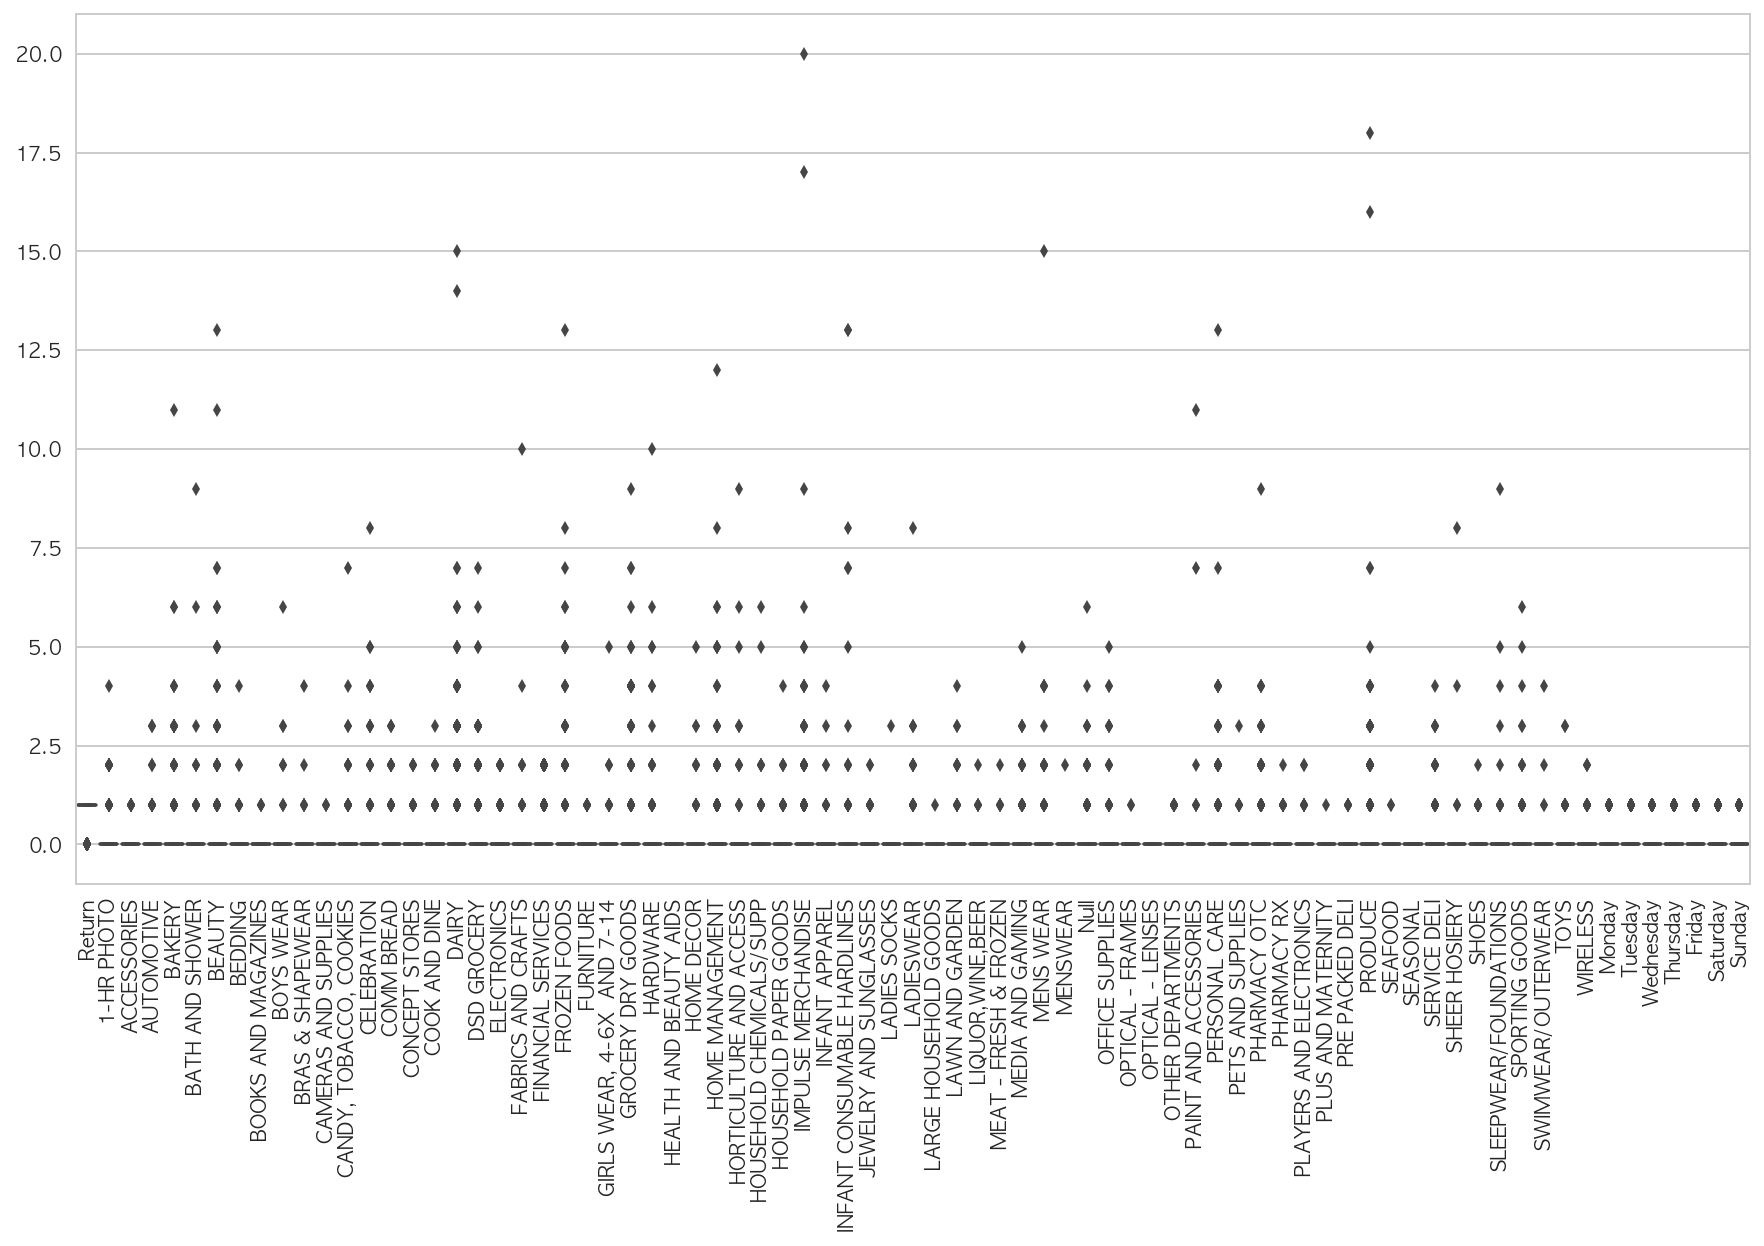

In [185]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[0][cols])
plt.xticks(rotation=90)
plt.show()

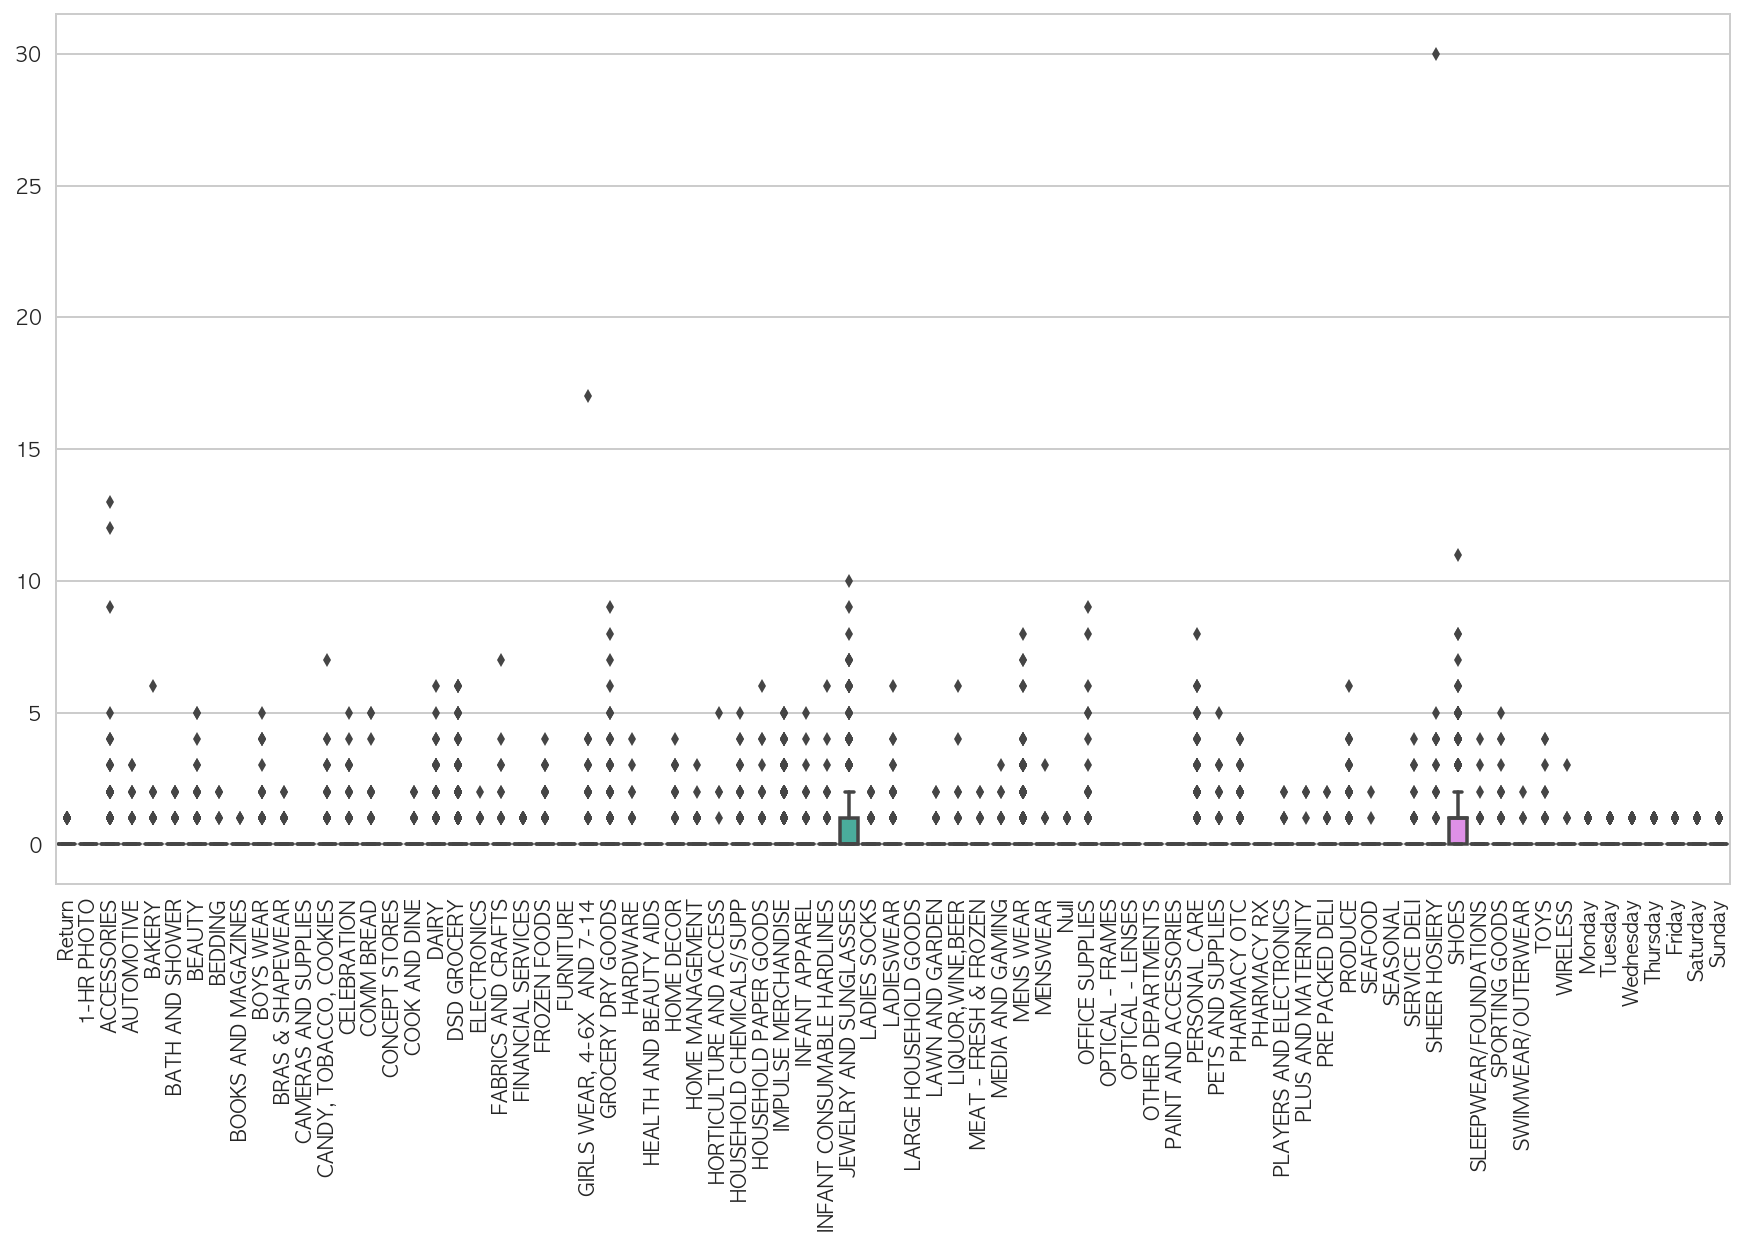

In [184]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[1][cols])
plt.xticks(rotation=90)
plt.show()

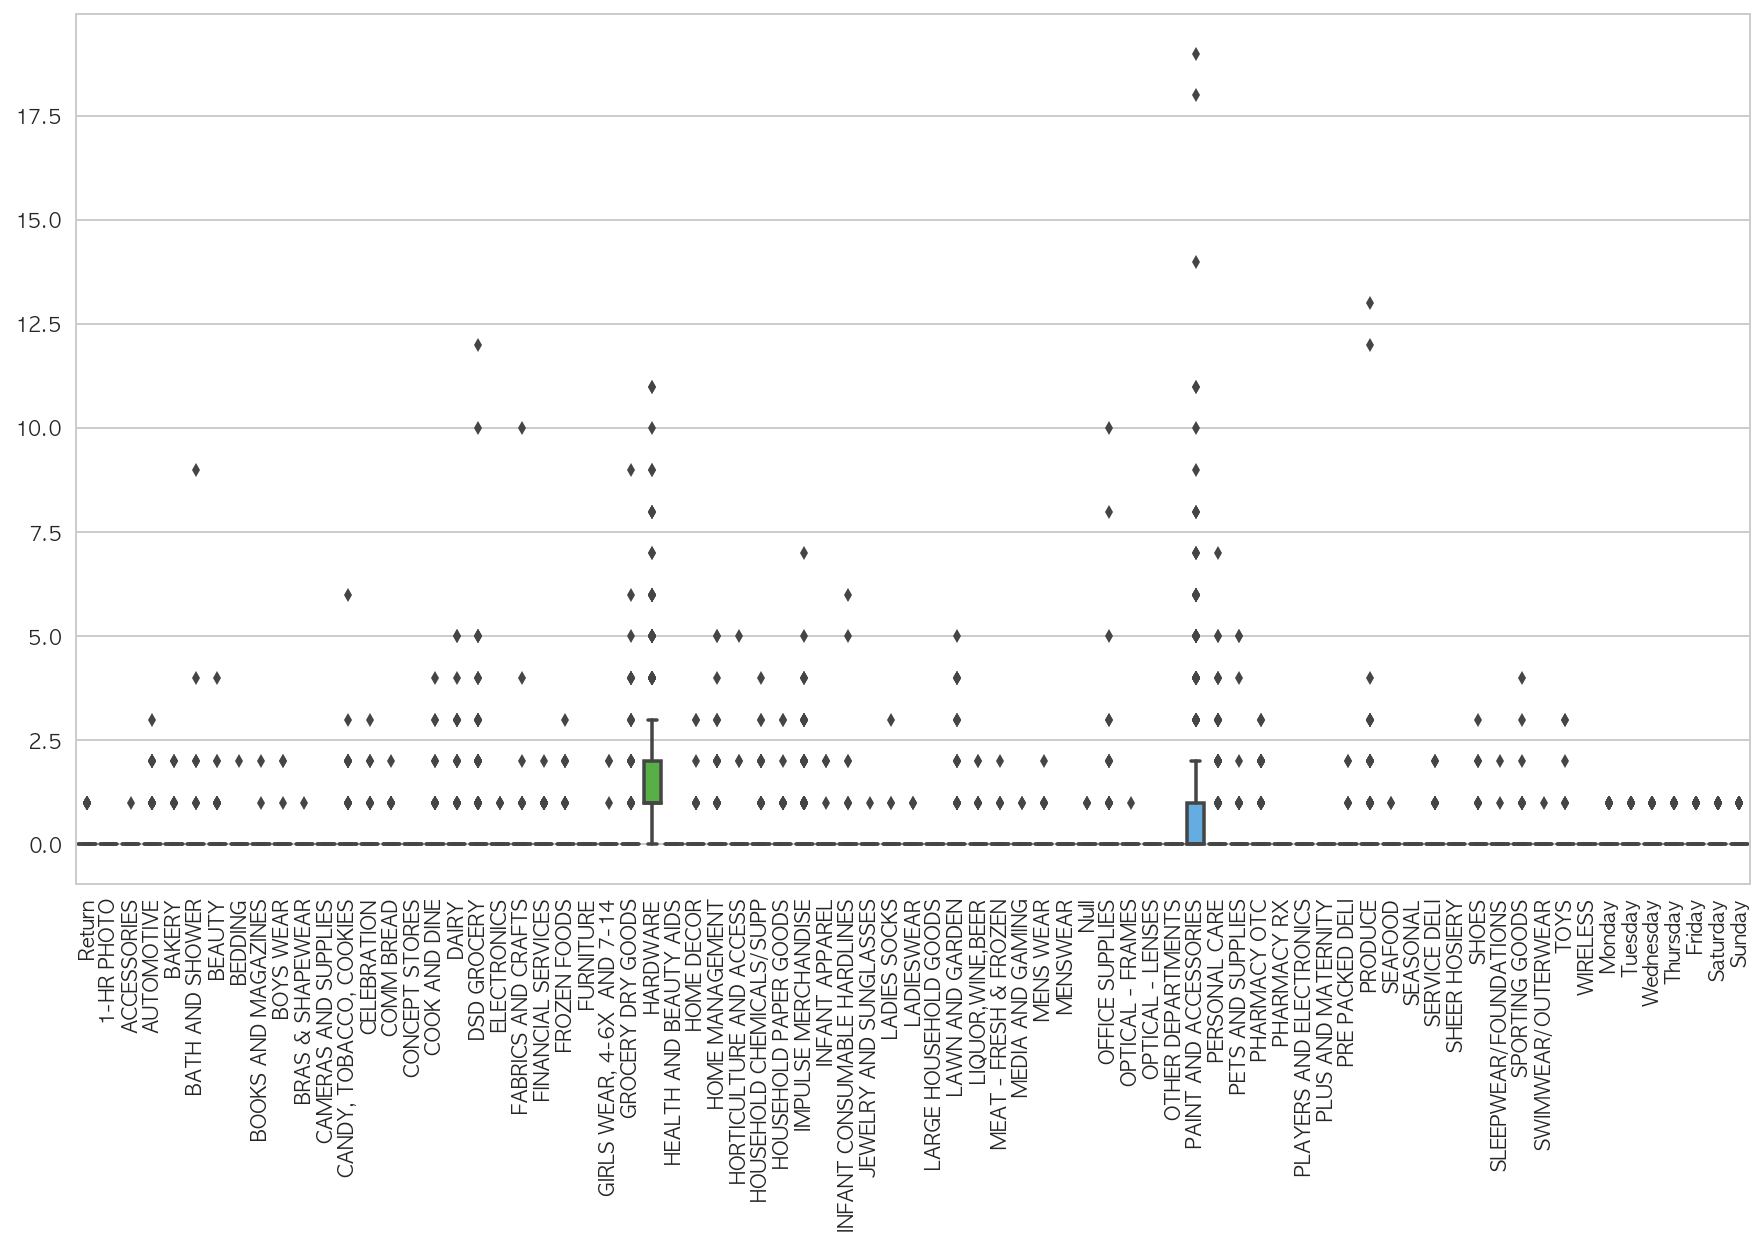

In [186]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[2][cols])
plt.xticks(rotation=90)
plt.show()

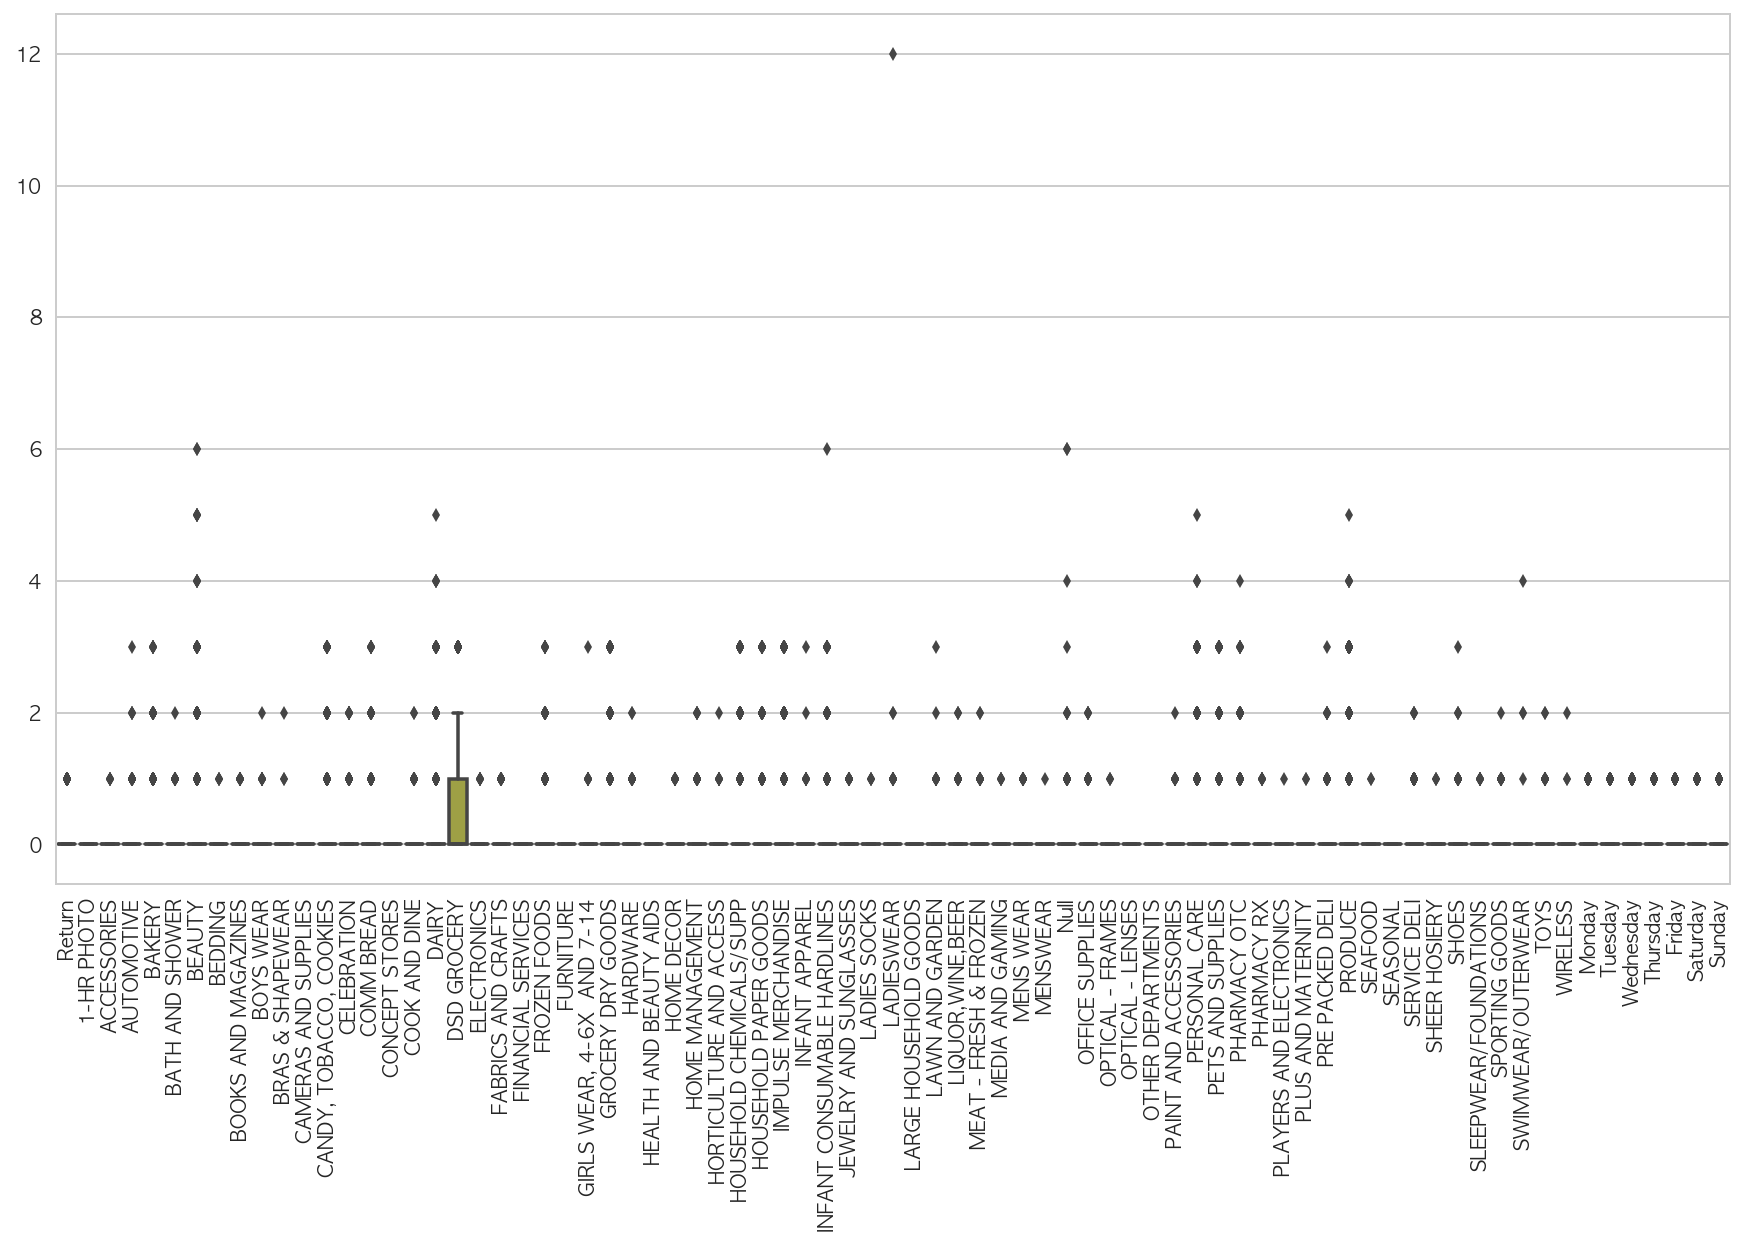

In [187]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[3][cols])
plt.xticks(rotation=90)
plt.show()

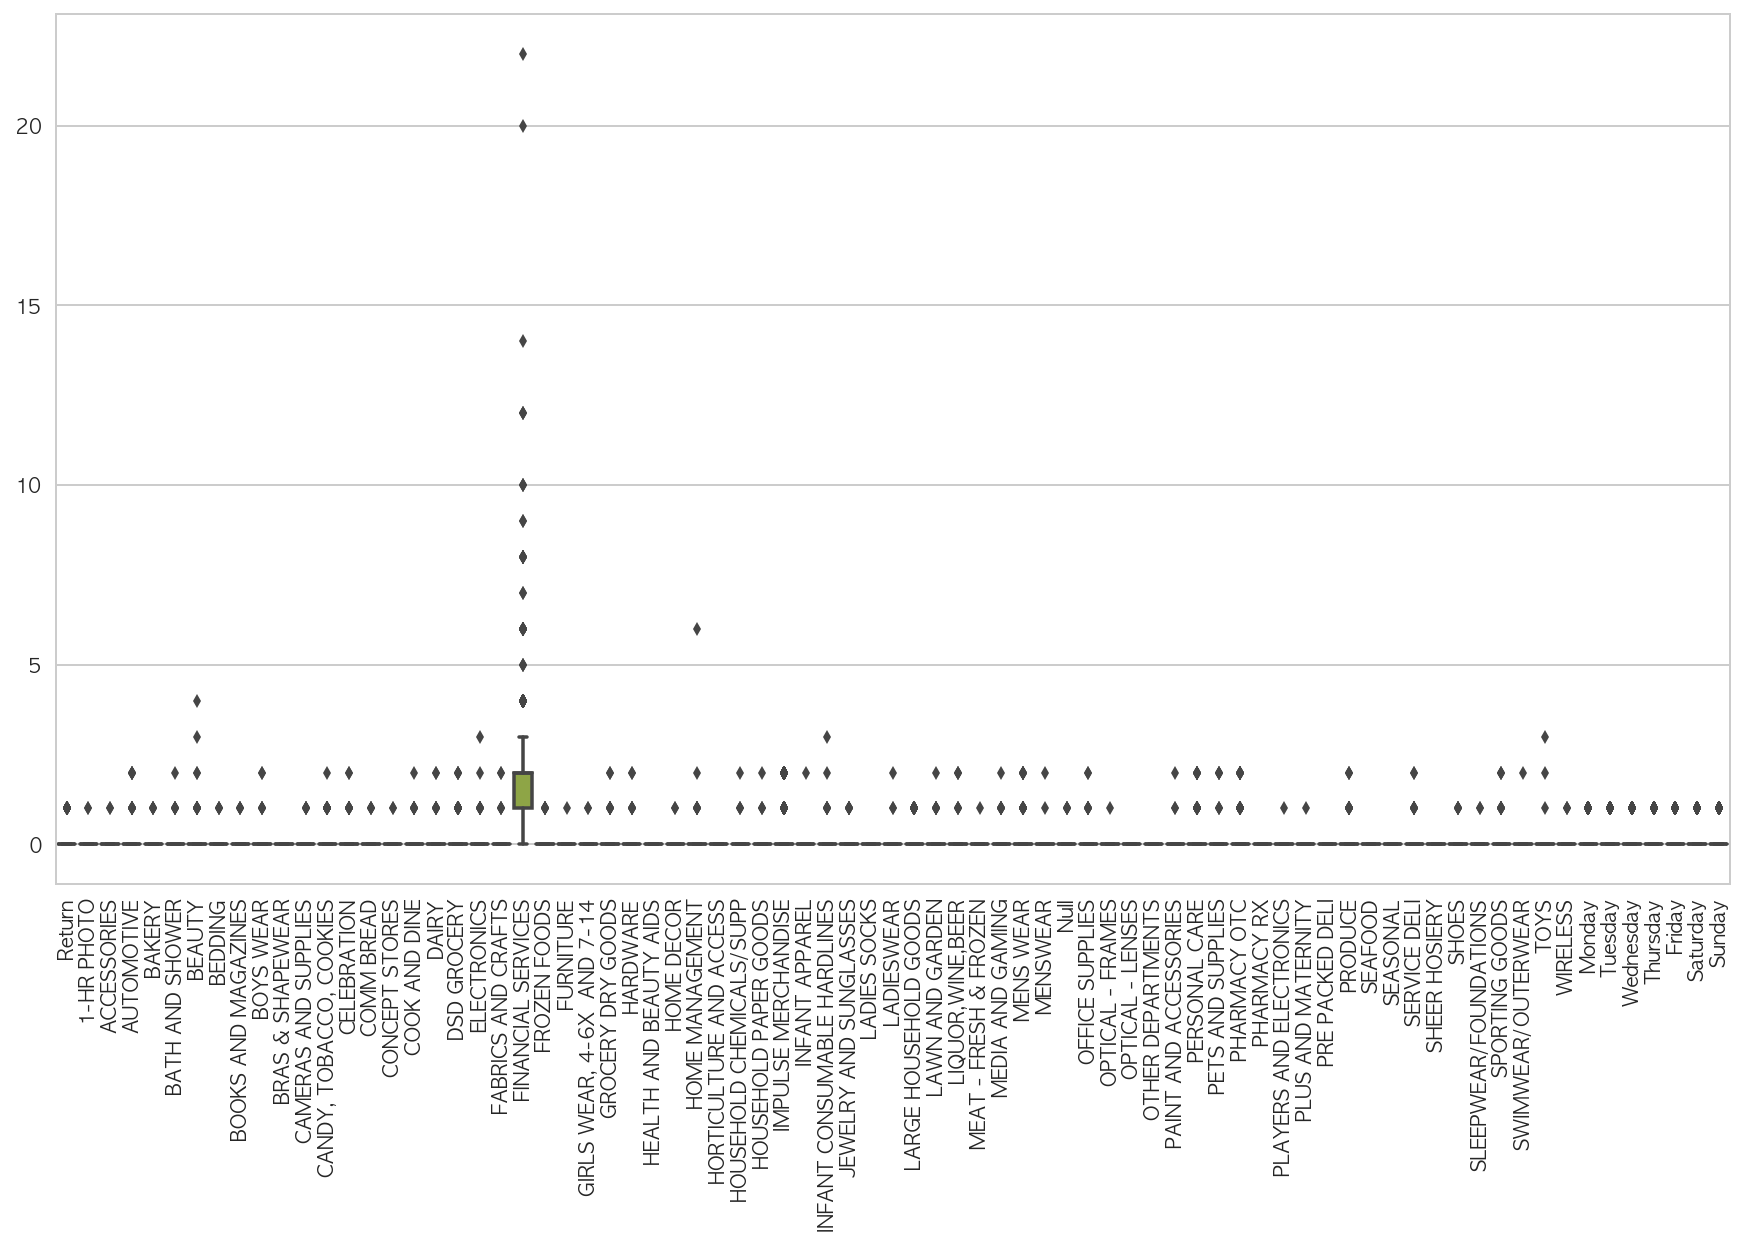

In [190]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[21][cols])
plt.xticks(rotation=90)
plt.show()

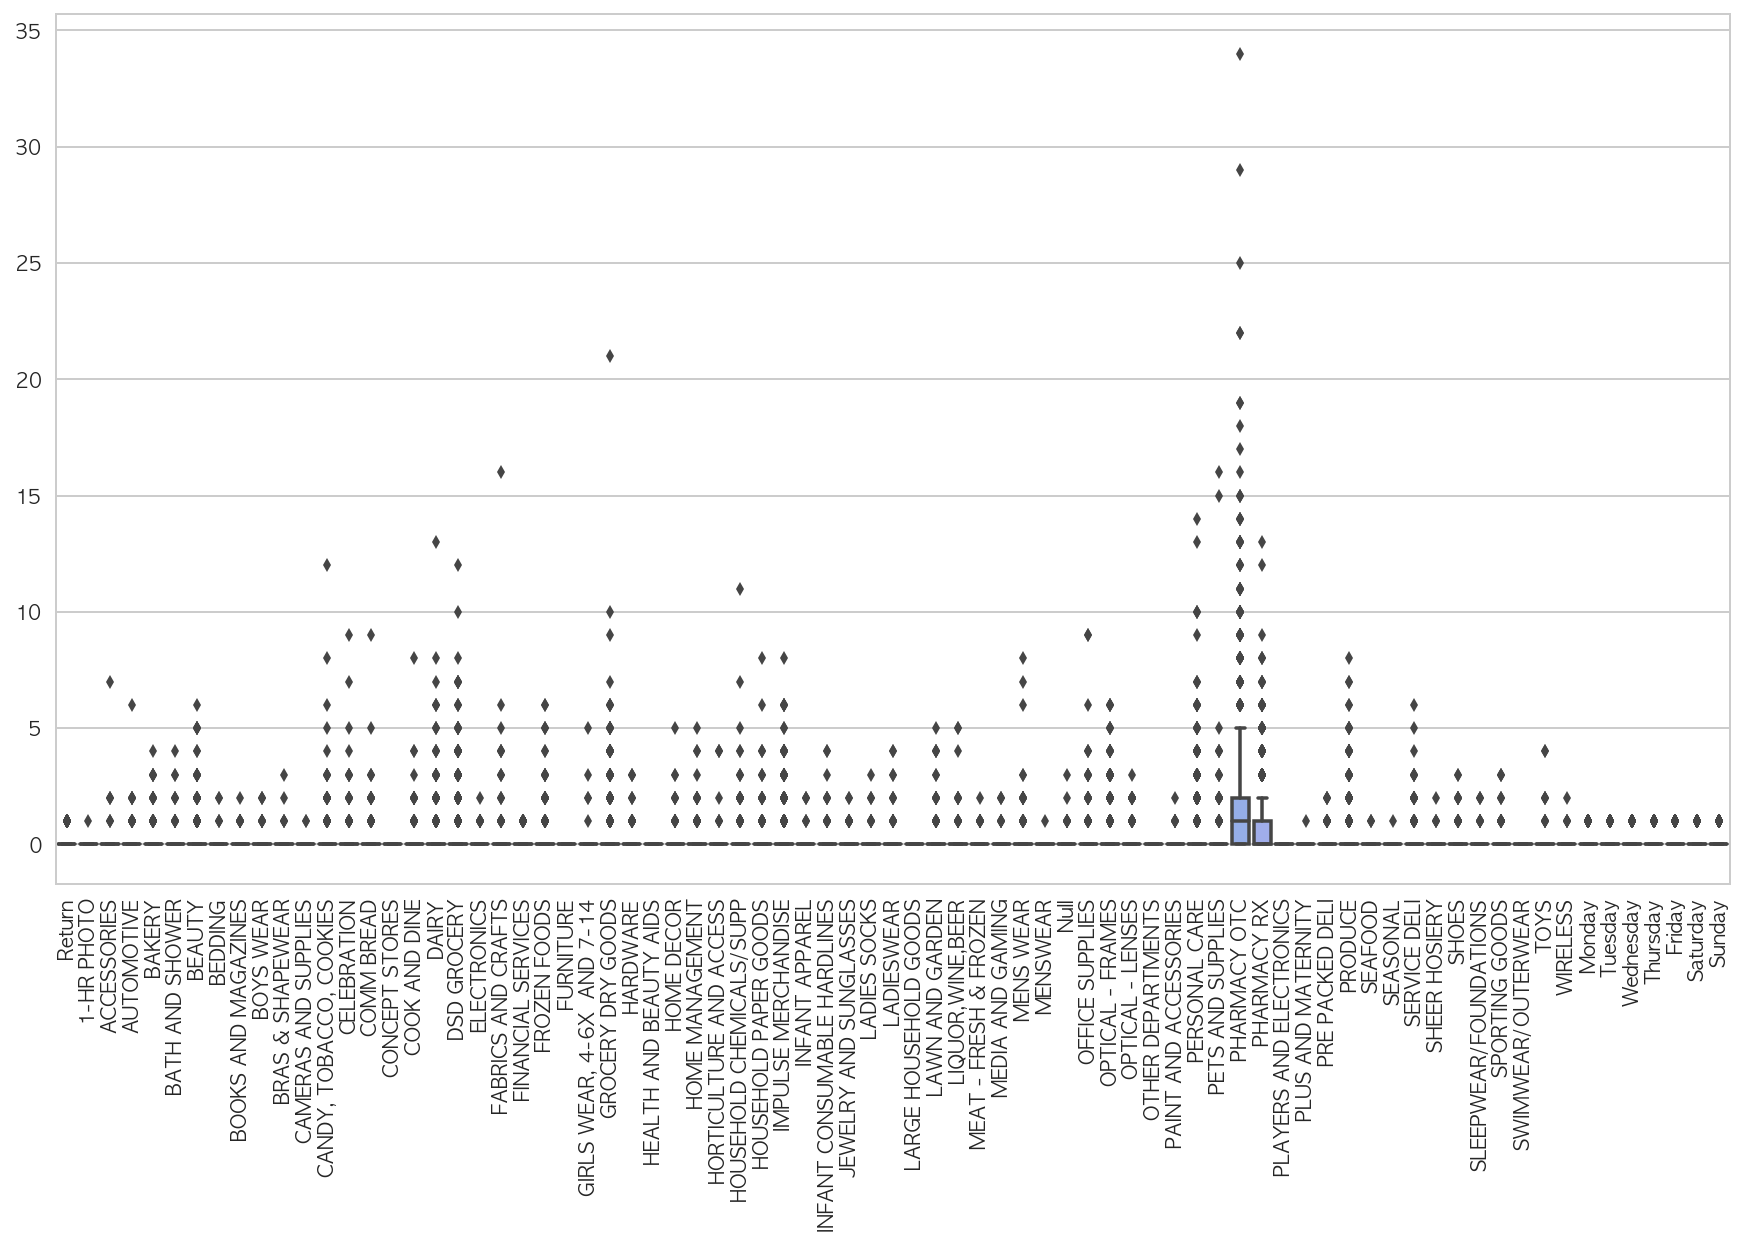

In [192]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=li_train_by_vn[20][cols])
plt.xticks(rotation=90)
plt.show()